In [8]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats
import random
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

N=(6+3)*100

# Exercise 1


In [3]:
model1 = CmdStanModel(stan_file='code_1.stan')
result1 = model1.sample(data={'N' : N},chains=1)
y1 = result1.stan_variable('y')
print(np.shape(y1))

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.



(1000, 900)


In [2]:
model2 = CmdStanModel(stan_file='code_2.stan')
result2 = model2.sample(data={'N' : N},chains=1)
y2 = result2.stan_variable('y')
print(np.shape(y2))

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:04 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.



(1000, 900)


# Exercise 2


In [10]:
model1_fit = CmdStanModel(stan_file='code_3.stan')
model2_fit = CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [12]:
print(len(y1))

1000


In [13]:
rand_sample = random.randint(0,len(y1))
data1 = {'N':N,'y':y1[rand_sample]}
data2 = {'N':N,'y':y2[rand_sample]}

In [15]:
result_fit1=model1_fit.sample(data=data1)
result_fit2=model2_fit.sample(data=data2)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)




chain 1 |█████████ | 00:03 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:04 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:04 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:04 Sampling completed                       
chain 2 |██████████| 00:04 Sampling completed                       
chain 3 |██████████| 00:04 Sampling completed                       
chain 4 |██████████| 00:04 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

<AxesSubplot:xlabel='Log'>

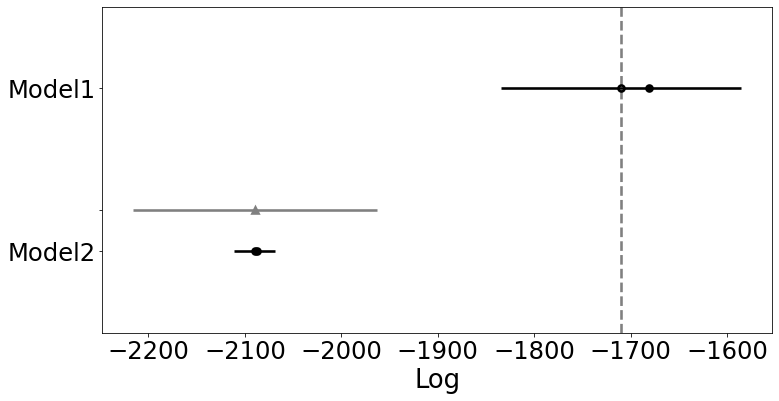

In [17]:
az.plot_compare(az.compare({"Model1":result_fit1,"Model2":result_fit2},ic='loo'),figsize=(12,6))

c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


<AxesSubplot:xlabel='Log'>

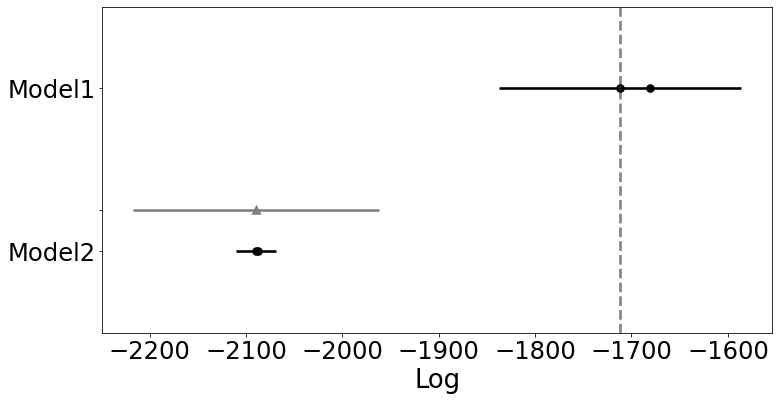

In [18]:
az.plot_compare(az.compare({"Model1":result_fit1,"Model2":result_fit2},ic='waic'),figsize=(12,6))

# Exercise 3


In [19]:
model5 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:compiling stan file C:\Users\slis\Desktop\DA\stanpy_i_spolka\7\code_5.stan to exe file C:\Users\slis\Desktop\DA\stanpy_i_spolka\7\code_5.exe
INFO:cmdstanpy:compiled model executable: C:\Users\slis\Desktop\DA\stanpy_i_spolka\7\code_5.exe


In [21]:

print(np.shape(np.transpose(np.matrix([y1[rand_sample]]))))

(900, 1)


In [25]:
rand_sample1 = random.randint(0,len(y1))
rand_sample2 = random.randint(0,len(y1))
rand_sample3 = random.randint(0,len(y1))
data1_1 = {'N':N,'K':1,'y':y1[rand_sample],'X' : np.transpose(np.matrix([y1[rand_sample1]]))}
data2_1 = {'N':N,'K':1,'y':y2[rand_sample],'X' : np.transpose(np.matrix([y2[rand_sample1]]))}

data1_2 = {'N':N,'K':2,'y':y1[rand_sample],'X' : np.transpose(np.matrix([y1[rand_sample1],y1[rand_sample2]]))}
data2_2 = {'N':N,'K':2,'y':y2[rand_sample],'X' : np.transpose(np.matrix([y2[rand_sample1],y2[rand_sample2]]))}

data1_3 = {'N':N,'K':3,'y':y1[rand_sample],'X' : np.transpose(np.matrix([y1[rand_sample1],y1[rand_sample2],y1[rand_sample3]]))}
data2_3 = {'N':N,'K':3,'y':y2[rand_sample],'X' : np.transpose(np.matrix([y2[rand_sample1],y2[rand_sample2],y2[rand_sample3]]))}

In [26]:
result1_1=model5.sample(data1_1)
result1_2=model5.sample(data1_2)
result1_3=model5.sample(data1_3)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)





chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)






chain 1 |█████████ | 00:04 Iteration: 1700 / 2000 [ 85%]  (Sampling)





chain 1 |██████████| 00:05 Sampling completed                       
chain 2 |██████████| 00:05 Sampling completed                       
chain 3 |██████████| 00:05 Sampling completed                       
chain 4 |██████████| 00:05 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▋ | 00:04 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:05 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:05 Sampling completed                       
chain 2 |██████████| 00:05 Sampling completed                       
chain 3 |██████████| 00:05 Sampling completed                       
chain 4 |██████████| 00:05 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:03 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:05 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:05 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:05 Sampling completed                       
chain 2 |██████████| 00:05 Sampling completed                       
chain 3 |██████████| 00:05 Sampling completed                       
chain 4 |██████████| 00:05 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider

<AxesSubplot:xlabel='Log'>

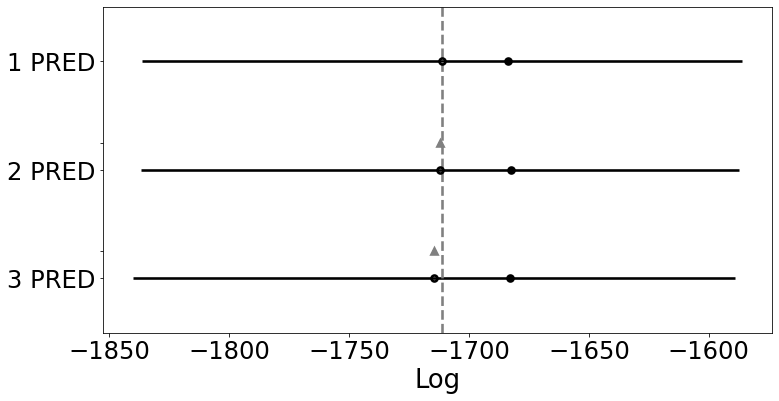

In [27]:
az.plot_compare(az.compare({"1 PRED":result1_1,"2 PRED":result1_2,"3 PRED":result1_3},ic='loo'),figsize=(12,6))

c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\st

<AxesSubplot:xlabel='Log'>

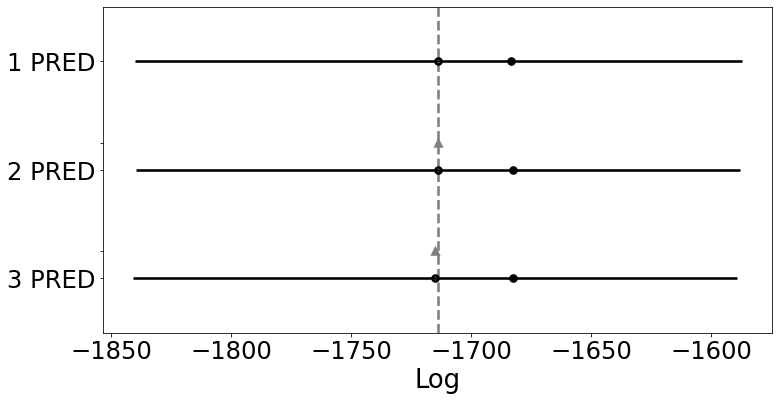

In [28]:
az.plot_compare(az.compare({"1 PRED":result1_1,"2 PRED":result1_2,"3 PRED":result1_3},ic='waic'),figsize=(12,6))

In [30]:
result2_1=model5.sample(data2_1)
result2_2=model5.sample(data2_2)
result2_3=model5.sample(data2_3)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:03 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:04 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |█████████▌| 00:04 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:05 Sampling completed                       
chain 2 |██████████| 00:05 Sampling completed                       
chain 3 |██████████| 00:05 Sampling completed                       
chain 4 |██████████| 00:05 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:03 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |█████████ | 00:04 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:04 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:05 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:05 Sampling completed                       
chain 2 |██████████| 00:05 Sampling completed                       
chain 3 |██████████| 00:05 Sampling completed                       
chain 4 |██████████| 00:05 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)



chain 1 |████████▏ | 00:03 Iteration: 1500 / 2000 [ 75%]  (Sampling)





chain 1 |█████████ | 00:04 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |█████████▌| 00:05 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:05 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:05 Sampling completed                       
chain 2 |██████████| 00:05 Sampling completed                       
chain 3 |██████████| 00:05 Sampling completed                       
chain 4 |██████████| 00:05 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


<AxesSubplot:xlabel='Log'>

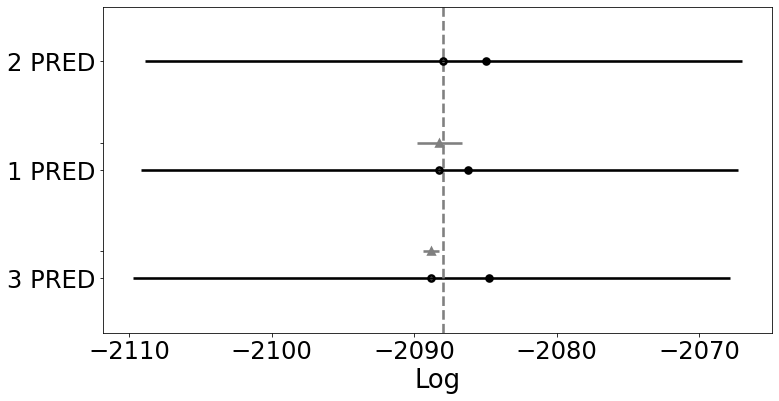

In [31]:
az.plot_compare(az.compare({"1 PRED":result2_1,"2 PRED":result2_2,"3 PRED":result2_3},ic='loo'),figsize=(12,6))

c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\slis\anaconda3\envs\Data-Analytics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


<AxesSubplot:xlabel='Log'>

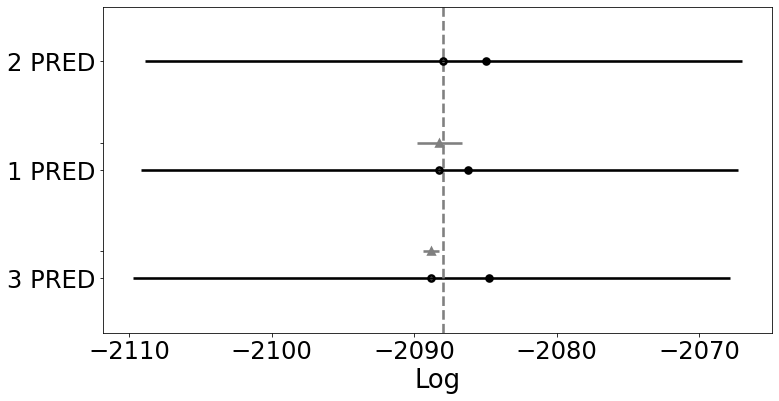

In [32]:
az.plot_compare(az.compare({"1 PRED":result2_1,"2 PRED":result2_2,"3 PRED":result2_3},ic='waic'),figsize=(12,6))